In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bd = pd.read_csv('Tech_Eval/blockchain_data.csv')
md = pd.read_csv('Tech_Eval/market_data.csv')

## Setting up a bitcoin value we care about. 

inter = bd[['asset_id', 'block_reward_sum']]
bd_btc = inter[inter['asset_id'] == 'Bitcoin_BTC_BTC']
bd_btc = bd_btc['block_reward_sum']

## Basic Analysis

What we're interested in here is the absolute most basic kinds of metrics we might want to see: moving averages, percentage change, that kind of thing. 

### Rolling Mean 

In [3]:
btc_rolling = bd_btc.rolling(10).mean().reset_index().drop('index', axis=1)
print(btc_rolling[10:30])

    block_reward_sum
10           1810.00
11           1820.00
12           1838.75
13           1856.25
14           1881.25
15           1888.75
16           1870.00
17           1890.00
18           1906.25
19           1925.00
20           1907.50
21           1886.25
22           1850.00
23           1816.25
24           1820.00
25           1808.75
26           1838.75
27           1841.25
28           1806.25
29           1800.00


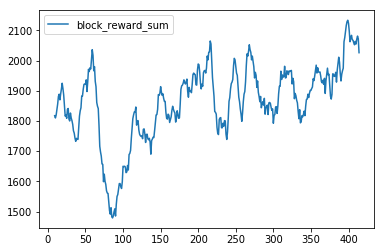

In [4]:
btc_rolling.plot()
plt.show()

#### Why do I care about rolling means? 

The rolling mean is calculated by looking at a defined window of past states and calculating the average of those states. This gives you a much bette general sense of the asset's movements. 

#### Future developments in rolling mean.

1) Define a function which can take an argument `n` defining the window of the rolling mean. Make this user-facing. 

### Percent Change 

In [8]:
bd_pct = bd_btc[:20].pct_change(1)
bd_pct[-1:]

95   -0.018987
Name: block_reward_sum, dtype: float64

#### Why do I care about Percent Change? 

Percent change can give you the percentage difference between a current value and the value at any previous time. Generally you look at percent change from the current day to the previous one, but there's no reason you can't look back even further. 

#### Future developments in Percent Change. 

1) As with rolling mean, make a user-facing function that takes an argument to determine how many units backwards to look. This is trivial.  
2) Make a function which takes an asset and an argument `n` which determines how far back to look and calculate the percent change from 1-back to n-back. Are there patterns? This could be the input into a Gaussian optimization function which determines the optimal predictive window for asset movements. 

## Fundamental Analysis 

#### NVT (Network Value to Transaction Ratio)
[Source](http://charts.woobull.com/bitcoin-nvt-ratio/)

In [6]:
# NVT = market cap / total daily transactions.
# Network value = market capitalization
# market cap = total number of assets * price per asset.
# total number of assets = bitcoin_data['supply_total'] 
# price per asset = market_data['price_close']. Choosing 'price_close' is arbitrary. 

# This is essentially the crypto analogue to P/E ratios. 

num_assets = bd.loc[0, ['supply_total']][0] # The total number of btc assets on 2-19-2019
price_per_asset = md.loc[0, ['price_close']][0] # Closing price of btc asset on 2-19-2019
trx_vol = bd.loc[0, ['txn_count']][0]

market_cap = (num_assets * price_per_asset)
NVT = (num_assets * price_per_asset)/trx_vol
print(NVT)

198929.5683690259


#### Why do I care about NVT?

NVT is not unlike the crypto equivalent of a P/E (price-per-share/earnings-per-share) ratio. Though neither the P/E ratio nor any other metric deployed in fundamentals analysis is a crystal ball, it is one of the basic tools which investors rely upon to get a sense of the health, momentum, and future of a company. 

When transposed into the key of crypto-currency markets, the NVT gives us roughly the same information. A company with a high P/E has a high price-per-share relative to their earnings-per-share. This tends to mean that either the company is overvalued or they are in a state of high growth[1](https://woobull.com/introducing-nvt-ratio-bitcoins-pe-ratio-use-it-to-detect-bubbles/). 

Because BTC isn't a company there is no way to calculate earnings. But, as BTC is generally used as either a store of value or a way to make payments, it has been argued that looking at the volume of transactions across the network is approximately equivalent to earnings.  

#### Future developments in NVT.

### MVRV (Market Cap to Realized Capital Ratio)
[Source](http://charts.woobull.com/bitcoin-mvrv-ratio/)

In [7]:
# MVRV = market cap / realized value
# realized value = total volume of assets * price at last movement on the blockchain. 
# Market cap is defined above.
# I think total volume can be taken as before from bd['supply_total'], though maybe I'm misinterpreting that. 
# None of the columns look like they contain 'price at last movement on the blockchain', so there's no way to do that.

# Tends to be used in discovering market peaks and discerning when a coin is underpriced.

# MVRV = (market_cap)/(num_assets * price at last mvmt on blockchain, a value which I can't currently calculate)

#### Why do I care about MVRV?

#### Future developments in MVRV. 

## Technical Analysis 